This notebook shows some examples of methods on a BandStructureSymmLine object (gettting band gaps, vbm, etc...) and basic plotting. Written by Geoffroy Hautier (geoffroy.hautier@uclouvain.be)

We start by querying the MP database for a band structure object. Please note that you could get such an object from a run (VASP, ABINIT, ...) using the methods in pymatgen.io


In [1]:
from pymatgen.matproj.rest import MPRester
from pymatgen.electronic_structure.core import Spin
#This initiliazes the Rest connection to the Materials Project db. Put your own API key if needed.
a = MPRester()
#load the band structure from mp-3748, CuAlO2 from the MP db
bs = a.get_bandstructure_by_material_id("mp-3748")

We print some information about the band structure

In [2]:
#is the material a metal (i.e., the fermi level cross a band)
print(bs.is_metal())
#print information on the band gap
print(bs.get_band_gap())
#print the energy of the 20th band and 10th kpoint
print(bs.bands[Spin.up][20][10])
#print energy of direct band gap
print(bs.get_direct_band_gap())
#print information on the vbm
print(bs.get_vbm())

False
{'energy': 1.7978000000000005, 'direct': False, 'transition': '(0.591,0.409,0.000)-\\Gamma'}
18.0201
2.6904
{'energy': 6.1023, 'kpoint': <pymatgen.electronic_structure.bandstructure.Kpoint object at 0x108c2d748>, 'projections': {}, 'kpoint_index': [123], 'band_index': defaultdict(<class 'list'>, {<Spin.up: 1>: [15]})}


Here, we plot the bs object. By default for an insulator we have en energy limit of cbm+4eV and vbm-4 eV

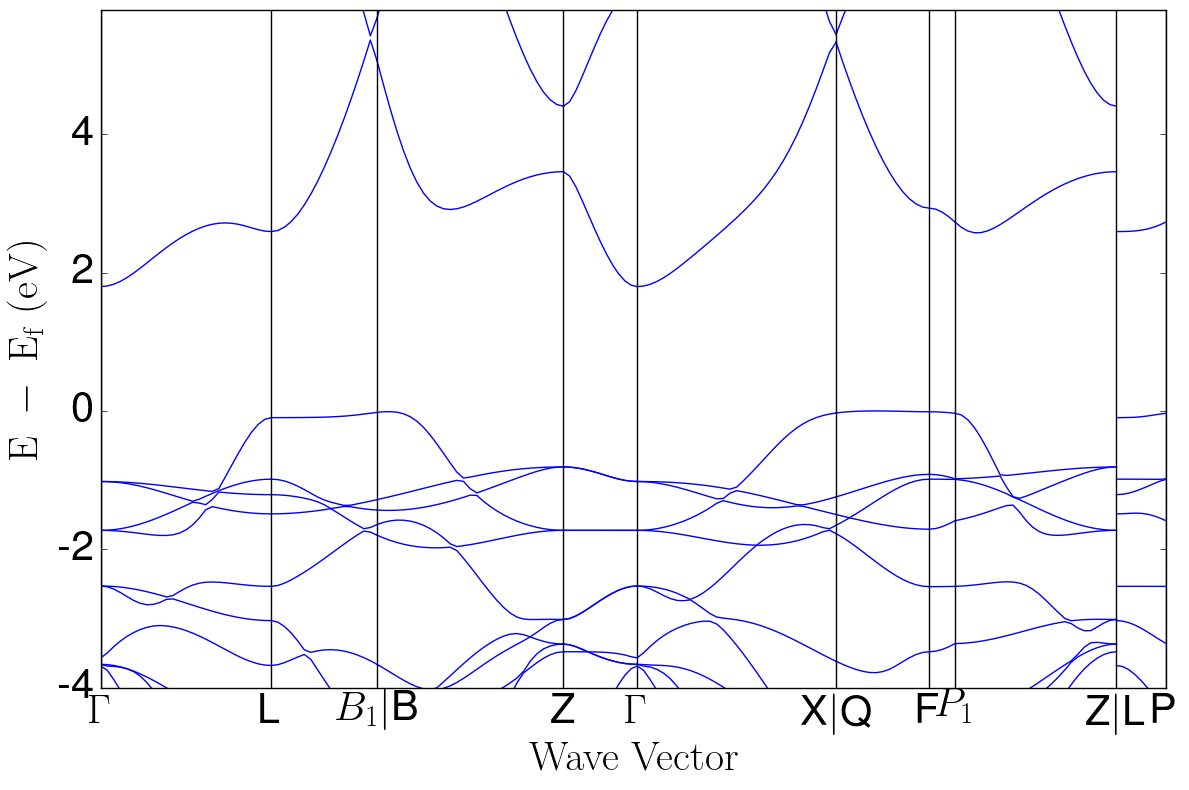

In [3]:
%matplotlib inline
from pymatgen.electronic_structure.plotter import BSPlotter
plotter = BSPlotter(bs)
plotter.get_plot().show()

We plot the Brillouin zone with the path which was used for the band structure

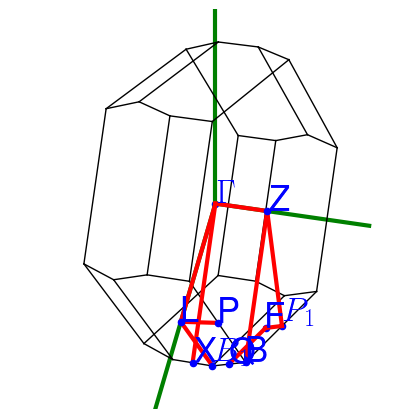

In [4]:
plotter.plot_brillouin()